https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html

In [48]:
#Importamos dataset de Titanic
import pandas as pd


In [49]:
data = pd.read_csv(r'https://raw.githubusercontent.com/Lawlesscodelen/thebridge_ds/master/data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# Cogemos la columna name y Pasamos todos los caracteres a minúscula y eliminamos puntuaciones utilizando str.lower y str.replace
data["Name"].str.lower().str.replace('[^\w\s]','')

0                                  braund mr owen harris
1        cumings mrs john bradley florence briggs thayer
2                                   heikkinen miss laina
3               futrelle mrs jacques heath lily may peel
4                                 allen mr william henry
5                                         moran mr james
6                                  mccarthy mr timothy j
7                           palsson master gosta leonard
8          johnson mrs oscar w elisabeth vilhelmina berg
9                        nasser mrs nicholas adele achem
10                         sandstrom miss marguerite rut
11                                bonnell miss elizabeth
12                          saundercock mr william henry
13                             andersson mr anders johan
14                    vestrom miss hulda amanda adolfina
15                          hewlett mrs mary d kingcome 
16                                    rice master eugene
17                            w

In [51]:
#Cree una nueva columna Surname que contenga el apellido de los Pasajeros extrayendo la parte antes de la coma.

#Usando el método Series.str.split (), cada uno de los valores se devuelve como una lista de 2 elementos. El primer elemento es la parte anterior a la coma y el segundo elemento la parte posterior a la coma.

data["Surname"] = data["Name"].str.split(",").str.get(0)

data["Surname"]


0                      Braund
1                     Cumings
2                   Heikkinen
3                    Futrelle
4                       Allen
5                       Moran
6                    McCarthy
7                     Palsson
8                     Johnson
9                      Nasser
10                  Sandstrom
11                    Bonnell
12                Saundercock
13                  Andersson
14                    Vestrom
15                    Hewlett
16                       Rice
17                   Williams
18              Vander Planke
19                 Masselmani
20                     Fynney
21                    Beesley
22                    McGowan
23                     Sloper
24                    Palsson
25                    Asplund
26                       Emir
27                    Fortune
28                    O'Dwyer
29                   Todoroff
30                  Uruchurtu
31                    Spencer
32                      Glynn
33        

In [52]:
#Extraiga los datos [todas las columnas] del pasajero 'Countess'.Infor sobre quién era: https://www.themarysue.com/the-countess-of-rothes/
serie = data.loc[:, "Name"]  # me quedo con la serie donde quiero hacer la selección (por comodidad visual)
serie.loc[serie.str.contains('Countess')]  # selección con condición
serie.loc[serie.str.contains('Countess')].index  # el índice de lo seleccionado con condición
data[data.loc[:, "Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


In [53]:
# Qué pasajero del titanic tiene el nombre más largo? Primero tenemos que dar un paso: 
# Obtener la longitud de cada uno de los nombres con series.str.len
data.loc[:, "Name"].str.len()

0      23
1      51
2      22
3      44
4      24
5      16
6      23
7      30
8      49
9      35
10     31
11     24
12     30
13     27
14     36
15     32
16     20
17     28
18     55
19     23
20     20
21     21
22     27
23     28
24     29
25     57
26     23
27     30
28     29
29     19
30     24
31     46
32     24
33     21
34     23
35     30
36     16
37     24
38     34
39     27
40     46
41     56
42     19
43     40
44     29
45     24
46     17
47     25
48     19
49     45
50     26
51     28
52     40
53     50
54     30
55     17
56     17
57     19
58     28
59     34
60     21
61     19
62     27
63     21
64     21
65     24
66     28
67     24
68     31
69     17
70     26
71     26
72     20
73     27
74     13
75     23
76     17
77     24
78     29
79     24
80     20
81     27
82     30
83     23
84     19
85     55
86     22
87     29
88     26
89     22
90     20
91     26
92     27
93     23
94     17
95     27
96     25
97     31
98     36
99     17


In [54]:
#A continuación, necesitamos obtener la ubicación correspondiente, preferiblemente la etiqueta de índice, en la tabla para la cual la longitud del nombre es la más grande. Utiliza el método idxmax.
data.loc[:, "Name"].str.len().idxmax()

307

In [55]:
#Utilizando loc sacamos el nombre 
data.loc[data["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [56]:
#Ahora pasamos a contar el número de apellidos que hay 
data.loc[:, 'Surname'].count()

891

In [57]:
surnames = data.loc[:, 'Surname'].value_counts().iloc[:20] # hacemos una lista de los apellidos más comunes y cogemos los 20 primeros
surnames

Andersson     9
Sage          7
Goodwin       6
Skoog         6
Panula        6
Johnson       6
Carter        6
Rice          5
Kelly         4
Harper        4
Ford          4
Harris        4
Asplund       4
Palsson       4
Gustafsson    4
Fortune       4
Baclini       4
Williams      4
Brown         4
Hart          4
Name: Surname, dtype: int64

In [58]:
#Importar matplotlib
import matplotlib.pyplot as plt

In [59]:
surnames.values

array([9, 7, 6, 6, 6, 6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int64)

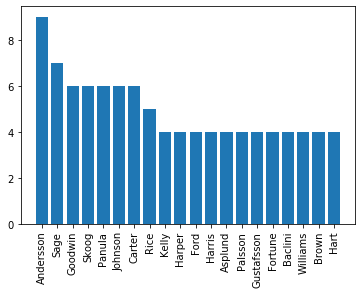

In [60]:
#Lo ponemos en un plotbar (gráfico de barras) #Podeís hacer la prueba de ver qué paso si ponemos rotación = 90 
plt.bar(surnames.index, surnames)
_ = plt.xticks(rotation=90) 

In [61]:
#Seleccionamos el apellido más común y vemos a qué clase pertenece cada uno y si han sobrevivido o no
data.loc[data.Surname=='Andersson', ['Surname', 'Pclass', 'Survived']]

,Surname,Pclass,Survived
13,Andersson,3,0
68,Andersson,3,1
119,Andersson,3,0
146,Andersson,3,1
541,Andersson,3,0
542,Andersson,3,0
610,Andersson,3,0
813,Andersson,3,0
850,Andersson,3,0


In [62]:
#Ahora con el apellido Williams
data.loc[data.Surname=='Williams', ['Surname', 'Pclass', 'Survived']]

,Surname,Pclass,Survived
17,Williams,2,1
155,Williams,1,0
304,Williams,3,0
735,Williams,3,0
